In [0]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions
library(caTools)
library(dplyr)
library(randomForest)
## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

[1] "CensusData.csv"

In [0]:
data=read.csv("../input/CensusData.csv")

In [0]:
names(data)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "Income"

In [0]:
str(data)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.we

In [0]:
for(i in names(data)){
    print(table(is.na(data[,i])))
}



FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 

FALSE 
32561 


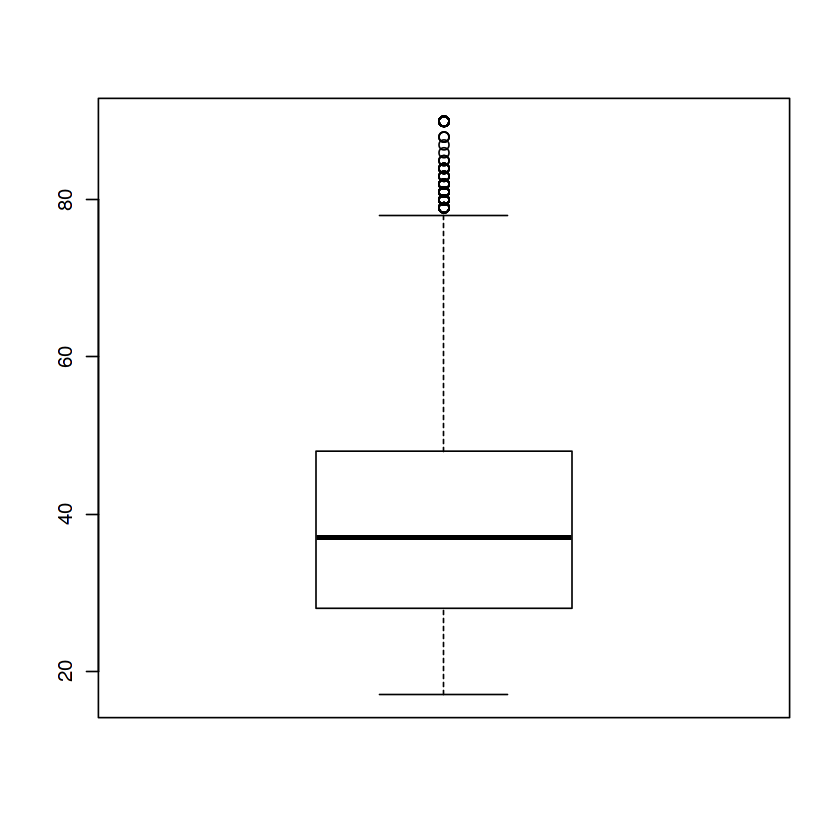

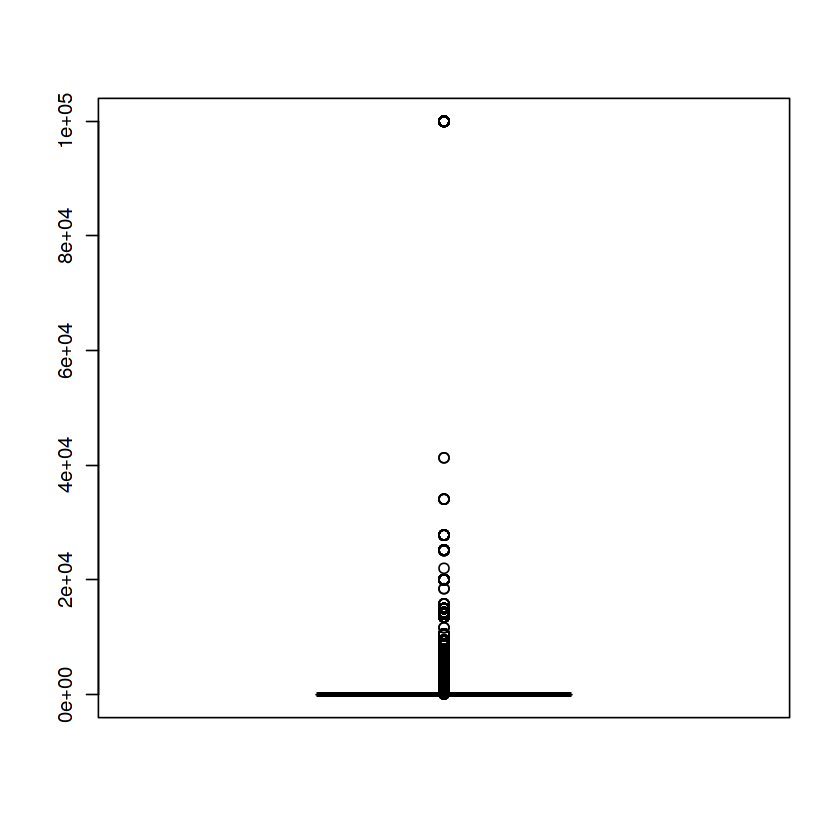

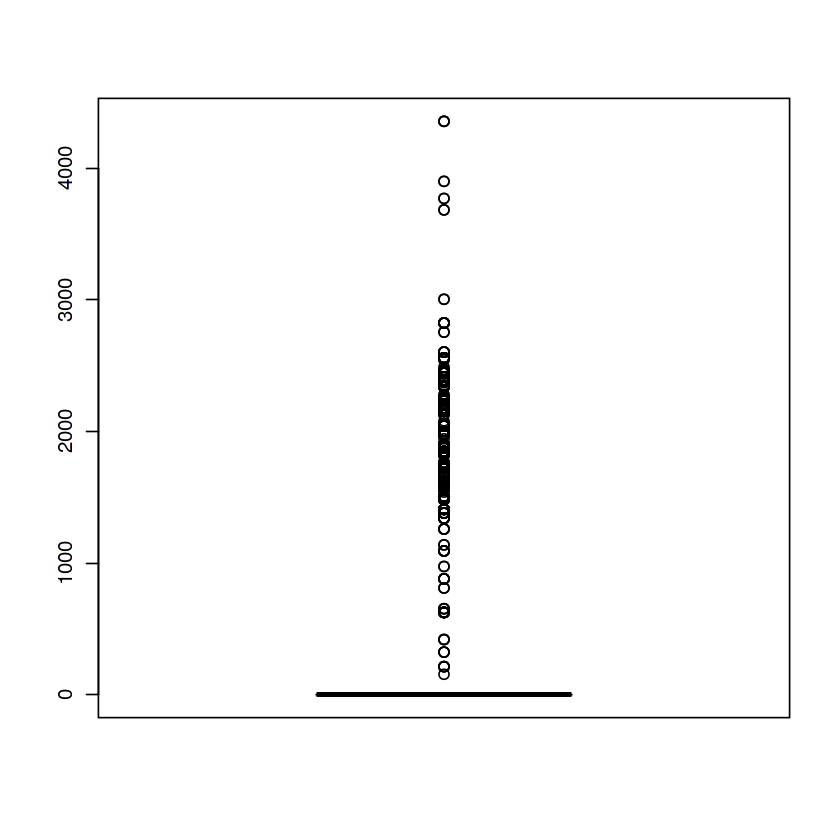

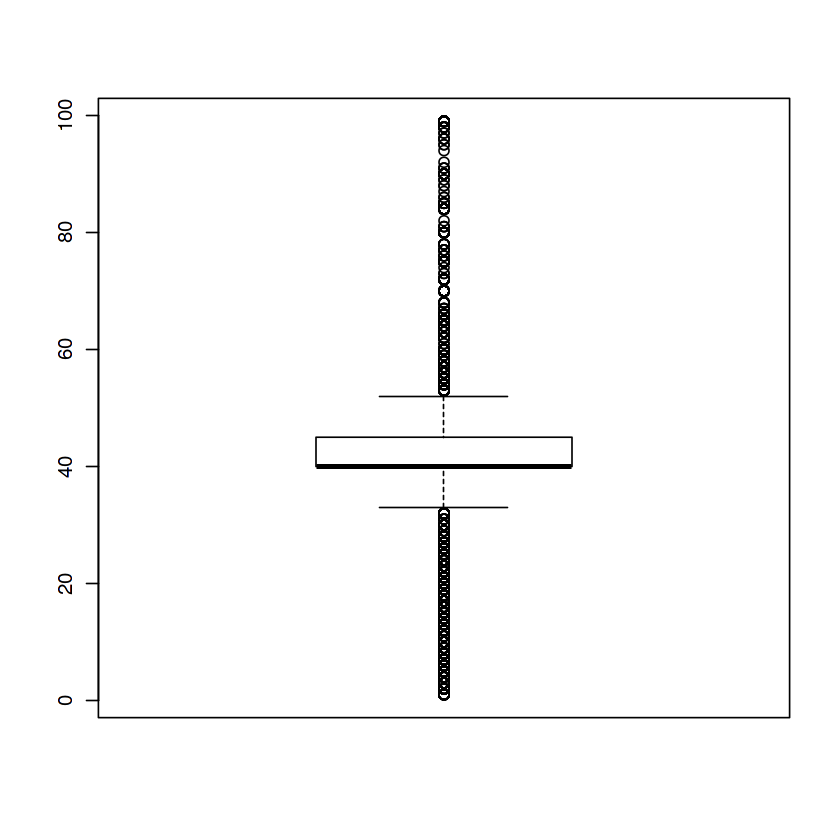

In [0]:
boxplot(data$age)
boxplot(data$capital.gain)
boxplot(data$capital.loss)
boxplot(data$hours.per.week)

In [0]:
summary(data$hours.per.week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.44   45.00   99.00 

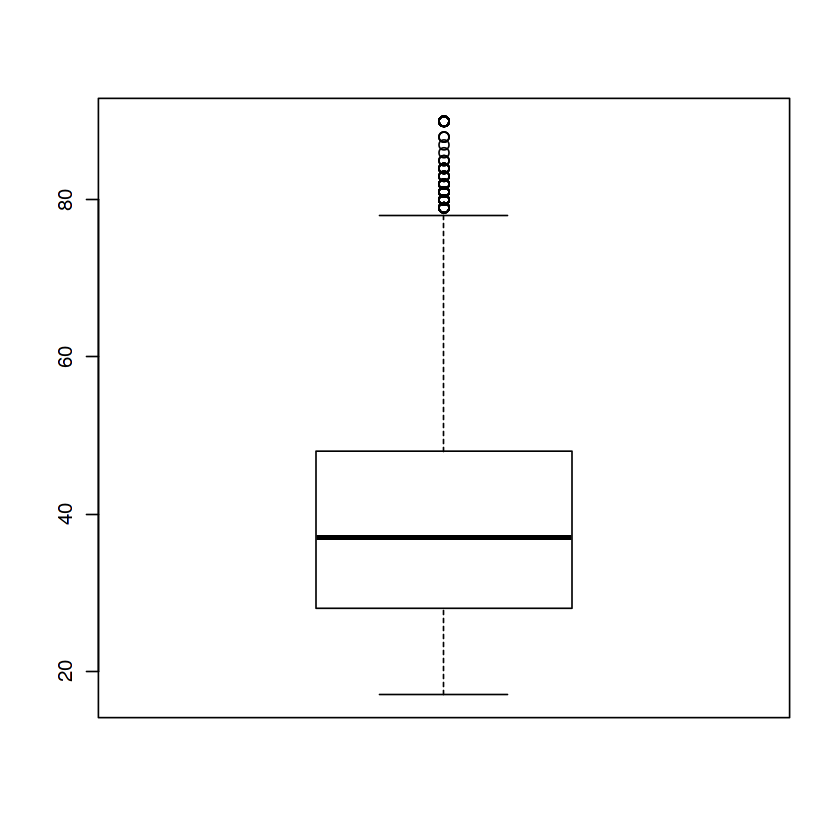

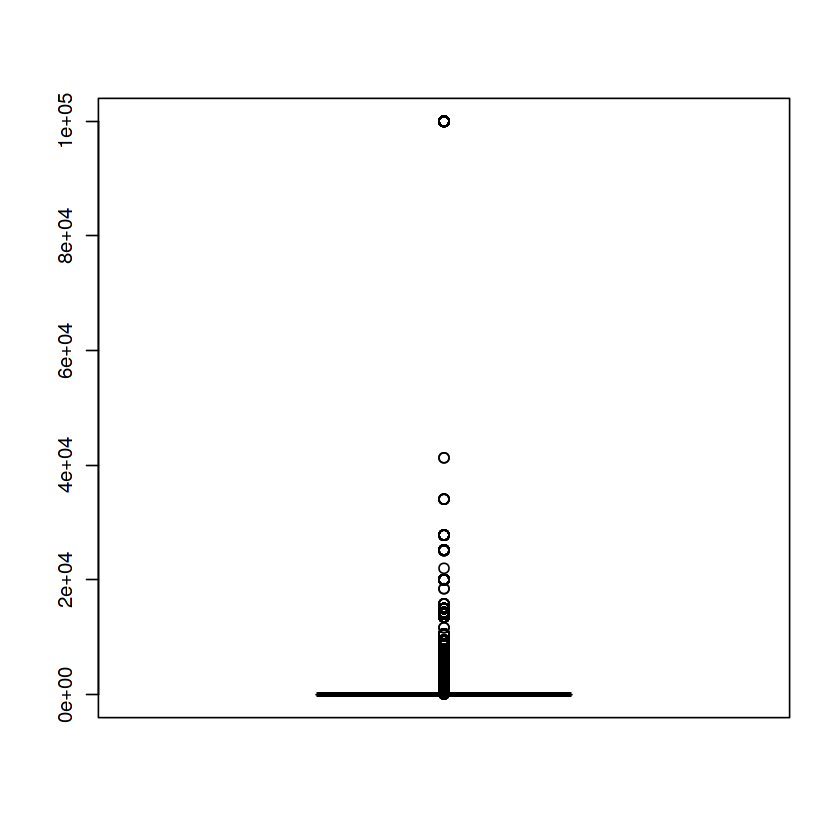

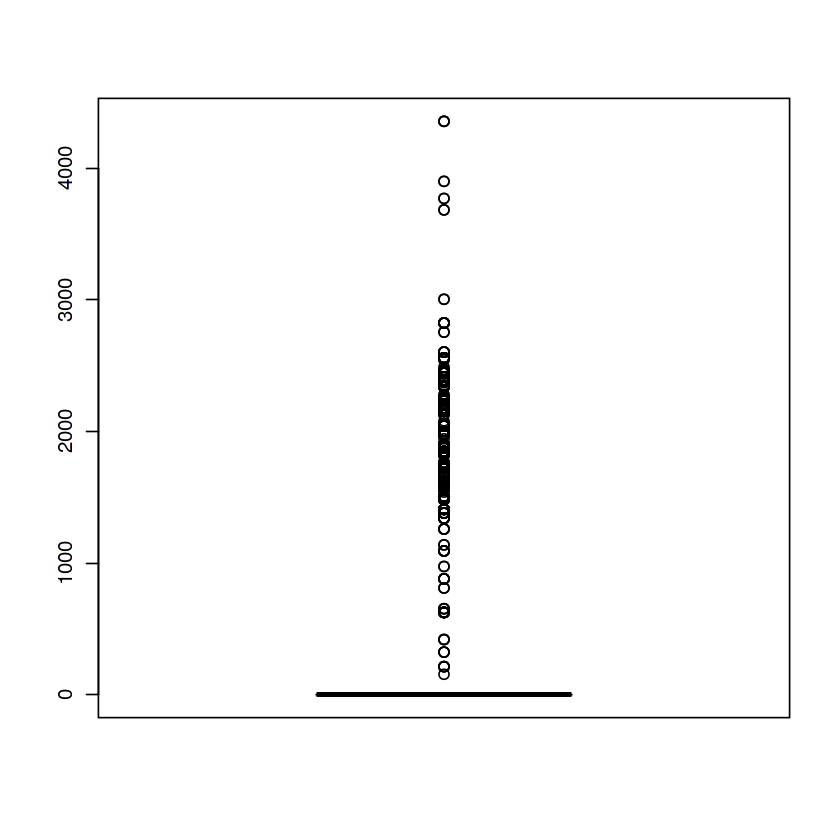

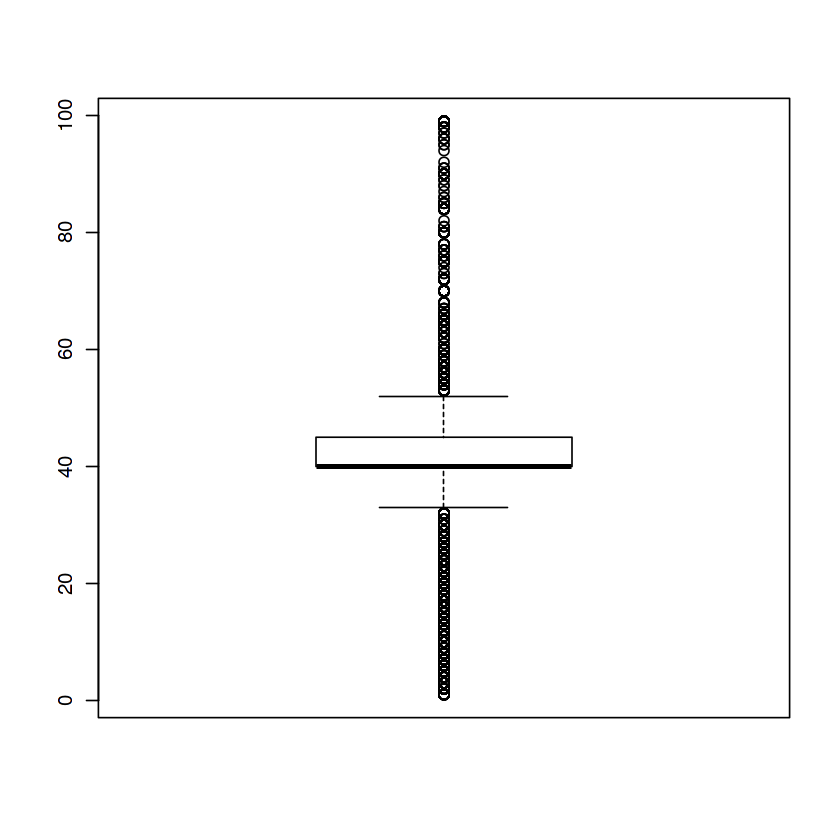

In [0]:
vmn=min(boxplot(data$age)$out)
bmin=min(boxplot(data$capital.gain)$out)
bxmin=min(boxplot(data$capital.loss)$out)
bxbmn=min(boxplot(data$hours.per.week)$out)

In [0]:
vmn
bmin
bxmin
bxbmn

[1] 79

[1] 114

[1] 155

[1] 1

In [0]:
data$capital.gain=ifelse(data$capital.gain>=bmin,median(data$capital.gain),data$capital.gain)

In [0]:
data$capital.loss=ifelse(data$capital.loss>=bxmin,median(data$capital.loss),data$capital.loss)

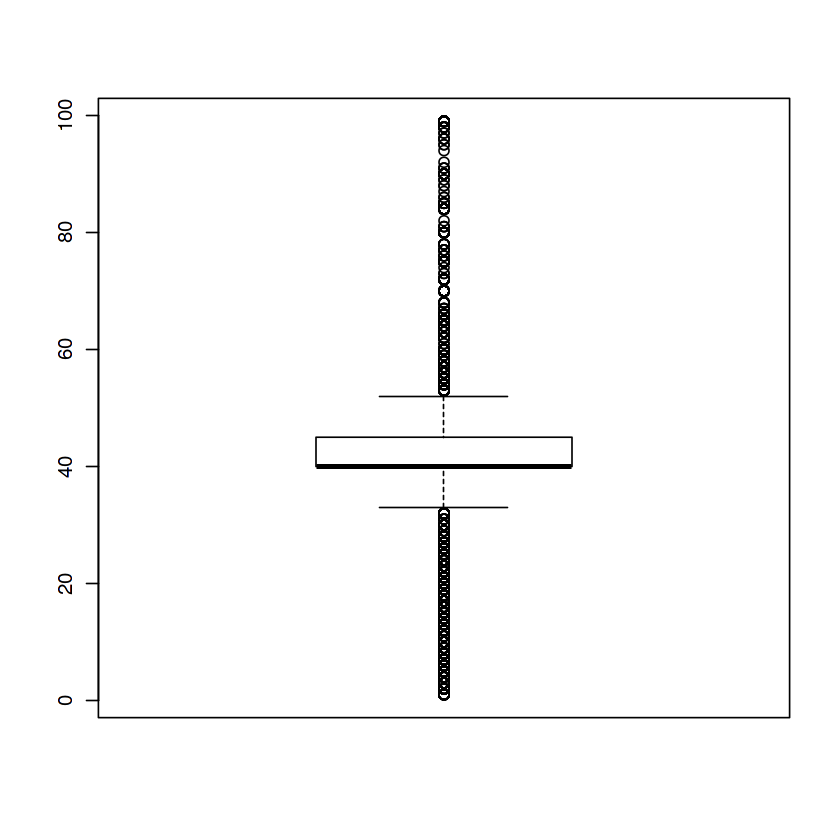

In [0]:
outliers=boxplot(data$hours.per.week)$out

In [0]:
data$hours.per.week=ifelse(data$hours.per.week %in% outliers,median(data$hours.per.week),data$hours.per.week)


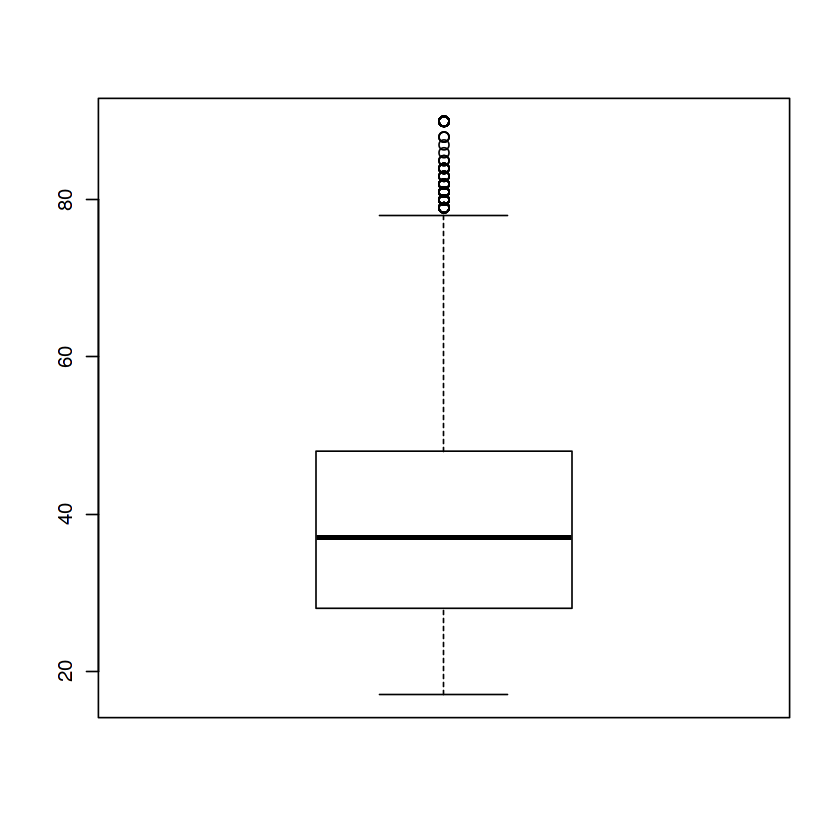

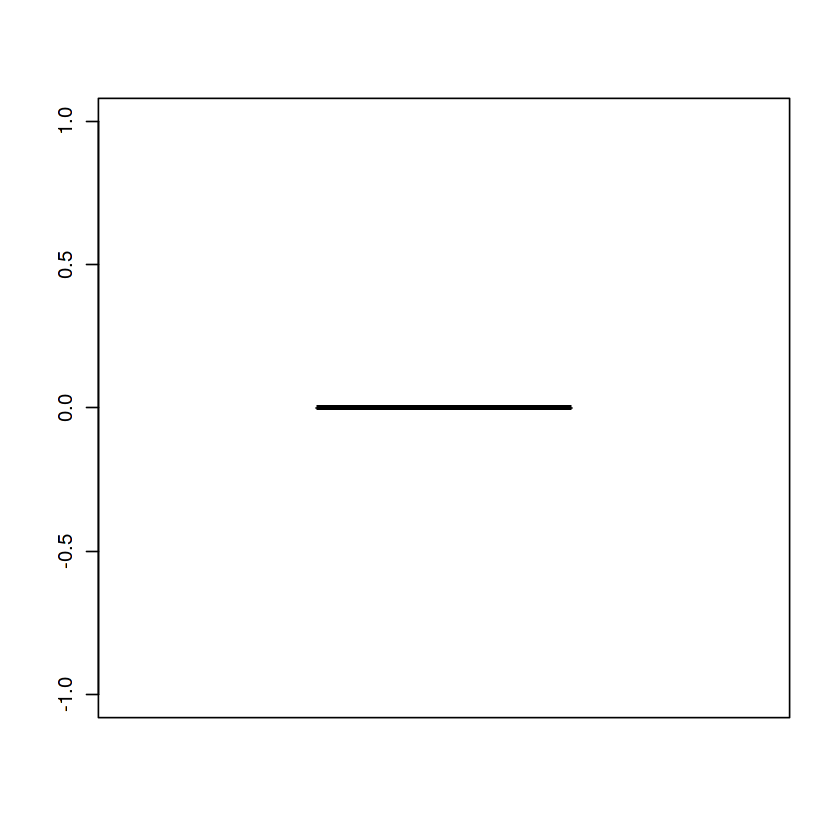

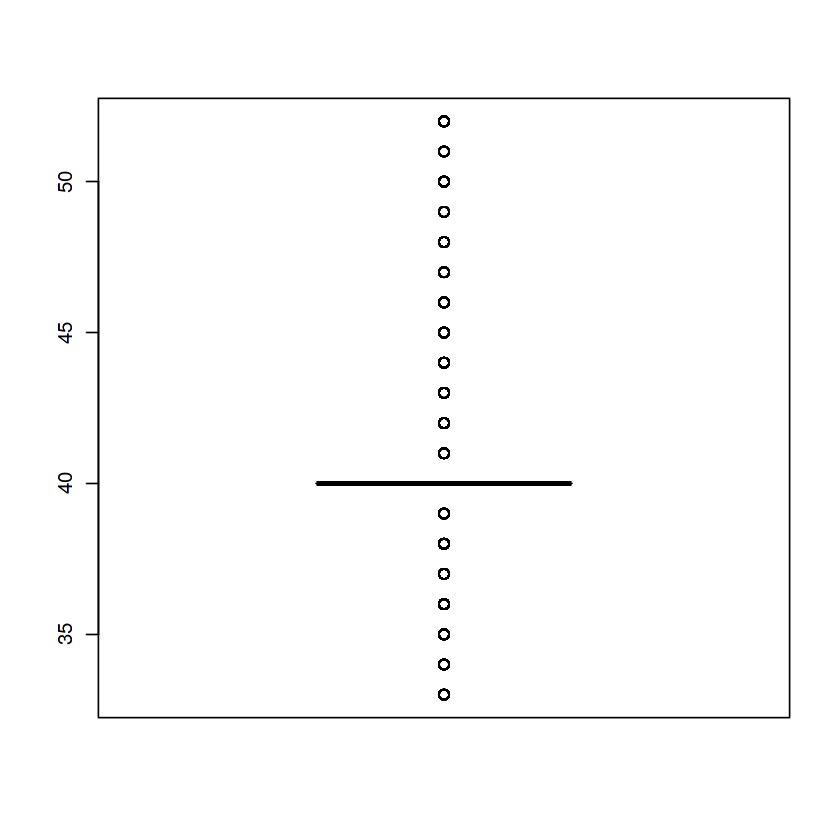

In [0]:
boxplot(data$age)
boxplot(data$capital.gain)
boxplot(data$capital.loss)
boxplot(data$hours.per.week)

In [0]:
data$hours.per.week

[1] 40 40 40 40 40 40 40 45 50 40 40 40 40 50 40 45 35 40 50 45 40 40 40 40
   [25] 40 40 40 40 40 40 52 44 40 40 40 40 40 40 38 40 43 40 50 40 35 40 38 40
   [49] 40 43 40 40 40 40 40 40 40 40 48 40 40 40 40 45 40 40 40 40 50 40 40 40
   [73] 40 40 40 40 40 40 40 40 40 40 40 48 40 35 40 50 40 50 40 40 40 35 40 50
   [97] 40 48 40 40 40 40 50 40 40 40 40 40 40 40 40 40 50 40 40 50 50 40 40 41
  [121] 40 40 40 50 35 40 40 40 40 40 40 40 35 50 36 40 40 35 40 40 40 40 40 40
  [145] 40 40 40 40 40 40 38 40 40 35 45 46 40 40 40 50 40 40 40 40 40 40 42 40
  [169] 40 40 40 40 40 50 40 40 40 40 40 40 38 40 45 40 42 40 40 50 50 40 40 40
  [193] 40 45 40 40 40 40 40 40 40 40 50 40 35 40 36 40 35 40 40 40 40 40 40 40
  [217] 40 50 40 40 40 40 40 40 35 40 40 50 40 40 40 38 42 40 40 40 38 50 40 40
  [241] 40 40 50 40 40 35 45 34 40 40 40 40 40 40 40 40 40 40 45 40 40 40 40 40
  [265] 40 40 40 40 45 40 40 40 40 35 40 40 40 40 40 48 40 40 45 42 40 40 40 45
  [289] 40 40 45 40 40 45 40 40 40 40 40 40 40 40 45 40 40 40 45 33 40 40 40 35
  [313] 40 40 40 40 40 40 40 40 40 50 45 40 40 45 40 50 40 40 45 40 40 40 40 48
  [337] 40 40 40 40 40 40 40 40 40 42 40 40 40 40 40 40 40 40 40 40 40 40 35 40
  [361] 40 40 45 45 40 40 45 40 45 40 40 40 38 40 40 40 40 40 40 50 40 45 40 40
  [385] 40 40 40 40 40 40 40 50 40 45 35 40 40 35 40 50 40 40 40 40 40 40 40 40
  [409] 40 50 40 40 40 40 40 50 40 40 40 40 40 40 40 40 35 40 40 40 40 40 40 40
  [433] 40 40 40 50 40 40 40 40 40 40 40 40 40 35 40 40 40 40 40 40 40 40 40 40
  [457] 40 50 40 40 40 40 50 40 40 40 40 40 45 40 40 40 40 40 40 40 40 40 40 35
  [481] 45 40 40 40 40 40 35 45 40 40 35 40 40 40 40 36 40 40 35 40 40 40 40 42
  [505] 40 40 40 40 40 40 42 40 45 50 45 38 40 40 35 50 40 50 50 45 40 40 40 40
  [529] 50 40 46 40 40 50 48 50 40 40 45 40 40 40 40 40 50 45 40 40 36 40 50 40
  [553] 40 40 40 40 40 40 40 40 40 35 50 40 40 48 45 40 35 42 40 40 40 40 40 40
  [577] 40 35 40 45 40 40 40 40 40 40 40 40 47 40 40 40 48 40 40 40 40 50 40 45
  [601] 40 40 40 40 40 37 40 40 40 40 40 40 50 40 40 40 45 40 40 45 40 40 40 40
  [625] 40 40 45 40 40 40 40 40 40 40 40 40 40 40 50 40 40 40 40 50 45 40 40 40
  [649] 50 40 40 50 40 45 40 40 40 45 35 40 40 40 40 38 40 40 40 40 40 40 40 40
  [673] 40 40 50 40 40 40 45 50 48 40 40 40 40 40 40 40 35 40 40 45 50 40 40 45
  [697] 40 40 40 40 50 40 40 40 40 50 40 40 35 40 40 40 40 40 35 40 40 40 40 45
  [721] 40 40 40 42 45 40 40 40 40 40 40 40 45 40 40 40 36 50 40 40 40 40 50 40
  [745] 40 40 40 40 40 37 40 40 40 50 40 38 40 45 40 40 40 38 40 40 40 42 40 40
  [769] 50 40 38 40 40 40 38 40 40 40 50 40 40 42 50 40 40 38 50 40 40 40 50 40
  [793] 33 40 40 40 40 40 35 40 40 40 40 38 40 48 40 47 40 40 36 40 45 40 40 40
  [817] 40 50 45 50 40 46 40 40 40 42 40 40 40 40 40 40 40 40 40 40 40 50 50 40
  [841] 40 50 40 48 40 40 50 45 40 40 40 40 50 40 50 40 40 40 40 40 40 40 50 40
  [865] 40 40 40 40 50 40 40 50 40 40 40 40 40 40 40 40 40 40 40 50 40 40 40 40
  [889] 40 45 40 40 40 50 40 40 40 50 45 40 40 40 40 40 45 38 52 40 40 40 40 44
  [913] 40 40 40 45 50 40 40 40 40 40 38 40 40 40 40 40 42 40 40 40 40 40 44 40
  [937] 40 40 40 40 40 40 40 45 40 35 40 45 35 40 40 43 40 40 40 40 40 40 40 40
  [961] 45 38 40 40 40 40 40 40 40 40 35 35 40 40 40 40 40 35 40 40 44 40 40 42
  [985] 40 40 35 40 40 40 40 40 40 50 45 40 45 40 40 50 40 40 40 40 40 40 40 40
 [1009] 52 50 40 40 40 44 40 40 40 40 40 40 50 35 40 40 40 50 45 40 40 50 40 40
 [1033] 40 40 40 40 40 40 40 40 40 40 40 40 37 40 40 40 50 50 40 40 40 40 40 40
 [1057] 40 40 40 47 35 40 40 40 40 40 40 40 50 40 40 40 50 46 40 40 40 50 40 40
 [1081] 40 35 40 40 40 40 40 35 52 40 40 50 40 40 40 40 40 40 40 40 40 40 40 50
 [1105] 40 33 47 40 40 40 45 45 38 40 40 40 40 50 40 40 40 40 38 40 35 40 50 40
 [1129] 45 45 40 40 40 38 40 50 45 40 40 35 40 45 40 37 40 44 40 50 35 40 40 39
 [1153] 40 40 40 40 45 50 40 40 40 40 40 40 40 40 40 40 40 40 43 40 40 40 40 40
 [1177] 40 48 40 45 40 45 40 40 40 40 40 40 40 35 40 40 40 40 40 40 40 40 40 40
 [12

In [0]:
str(data)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  4

In [0]:
library(randomForest)

In [0]:
mode=randomForest(Income~.,data)

In [0]:
tst=data[,-15]

In [0]:
output=predict(mode,tst)

In [0]:
output

1      2      3      4      5      6      7      8      9     10     11 
 <=50K   >50K  <=50K  <=50K  <=50K   >50K  <=50K   >50K  <=50K   >50K   >50K 
    12     13     14     15     16     17     18     19     20     21     22 
  >50K  <=50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K   >50K   >50K  <=50K 
    23     24     25     26     27     28     29     30     31     32     33 
 <=50K  <=50K  <=50K   >50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K  <=50K 
    34     35     36     37     38     39     40     41     42     43     44 
 <=50K  <=50K  <=50K  <=50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K  <=50K 
    45     46     47     48     49     50     51     52     53     54     55 
 <=50K   >50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K   >50K   >50K  <=50K 
    56     57     58     59     60     61     62     63     64     65     66 
  >50K  <=50K  <=50K  <=50K  <=50K   >50K  <=50K  <=50K   >50K  <=50K  <=50K 
    67     68     69     70     71     72     73     74     75     76     77 
 <=50K  <=50K   >50K  <=50K  <=50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K 
    78     79     80     81     82     83     84     85     86     87     88 
 <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K   >50K   >50K 
    89     90     91     92     93     94     95     96     97     98     99 
 <=50K   >50K   >50K  <=50K  <=50K  <=50K   >50K  <=50K   >50K   >50K  <=50K 
   100    101    102    103    104    105    106    107    108    109    110 
 <=50K   >50K   >50K  <=50K  <=50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K 
   111    112    113    114    115    116    117    118    119    120    121 
 <=50K   >50K   >50K  <=50K  <=50K  <=50K   >50K   >50K   >50K  <=50K  <=50K 
   122    123    124    125    126    127    128    129    130    131    132 
  >50K  <=50K   >50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K 
   133    134    135    136    137    138    139    140    141    142    143 
 <=50K   >50K  <=50K   >50K  <=50K  <=50K  <=50K   >50K  <=50K  <=50K  <=50K 
   144    145    146    147    148    149    150    151    152    153    154 
 <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K 
   155    156    157    158    159    160    161    162    163    164    165 
  >50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K   >50K 
   166    167    168    169    170    171    172    173    174    175    176 
 <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K   >50K  <=50K   >50K  <=50K 
   177    178    179    180    181    182    183    184    185    186    187 
 <=50K  <=50K  <=50K   >50K   >50K  <=50K  <=50K  <=50K   >50K  <=50K  <=50K 
   188    189    190    191    192    193    194    195    196    197    198 
 <=50K   >50K   >50K  <=50K  <=50K  <=50K   >50K   >50K  <=50K  <=50K   >50K 
   199    200    201    202    203    204    205    206    207    208    209 
  >50K  <=50K  <=50K  <=50K   >50K  <=50K  <=50K  <=50K   >50K  <=50K   >50K 
   210    211    212    213    214    215    216    217    218    219    220 
 <=50K  <=50K  <=50K  <=50K  <=50K   >50K   >50K  <=50K  <=50K   >50K  <=50K 
   221    222    223    224    225    226    227    228    229    230    231 
 <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K 
   232    233    234    235    236    237    238    239    240    241    242 
 <=50K  <=50K  <=50K  <=50K  <=50K  <=50K   >50K   >50K  <=50K   >50K  <=50K 
   243    244    245    246    247    248    249    250    251    252    253 
 <=50K  <=50K  <=50K  <=50K   >50K  <=50K   >50K  <=50K   >50K  <=50K  <=50K 
   254    255    256    257    258    259    260    261    262    263    264 
 <=50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K  <=50K   >50K 
   265    266    267    268    269    270    271    272    273    274    275 
 <=50K   >50K  <=50K   >50K  <=50K  <=50K   >50K  <=50K  <=50K  <=50K  <=50K 
   276    277    278    279    280    281    282    283    284    285    286 
 <=50K  <=50K  <=50K  <=50K